In [1]:
# import libraries
import tweepy
import csv
import matplotlib as plt
import pandas as pd
import numpy as np
import pymongo
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
client = pymongo.MongoClient('localhost', 27017)
db = client['nlp-skripsi']
coll = db.gojek_reviews

i = 0
header = ['id', 'date', 'username', 'text', 'score', 'polarity']

with open('reviews_unprocessed.csv', 'w', encoding='utf-8') as file:
    csvwriter = csv.writer(file)
    csvwriter.writerow(i for i in header)

    for review in coll.find():
        i += 1

        id = review['reviewId']
        date = review['at']
        username = review['userName']
        text = review['content']
        score = review['score']
        polarity = 1 if review['score'] > 3 else -1 if review['score'] < 3 else 0

        csvwriter.writerow([id, date, username, text, score, polarity])
    
print('jumlah data: ', i)

jumlah data:  77411


In [6]:
# Dataframe
df = pd.read_csv('reviews_unprocessed.csv', usecols = ['date','username','text','score','polarity'])
df.index.name = 'no'

print ('Dataset size, column:', df.shape)
# df.info()
df.sample(n=10)

Dataset size, column: (77411, 5)


,date,username,text,score,polarity
no,,,,,
17043,2019-03-17 08:49:25,harsono ssiagian,nomor plat yg di gunakan motor tak sesuai dgn ...,2,-1
36449,2019-12-05 06:05:21,Abraary Irawan,"Tampilan app yang bagus, pelayanan driver suda...",4,1
8828,2019-02-14 19:30:40,Pengguna Google,MOHON BUAT GO JEK. BILA KASIH DRIVER MOHON KAS...,2,-1
26053,2021-08-31 22:11:47,Rahmayani Weku,Tolong lahh saya sudah upgrade ke gopay plus s...,3,0
28766,2021-08-18 11:09:23,Aquatta Aquatta,"Banyakin promo kayak aplikasi sebelah dong, he...",4,1
22232,2019-03-06 00:15:05,Devil Store,kasian driver HARGANYA JADI MINIM :'(,2,-1
25518,2021-03-03 02:43:34,Permadiyan Setiawan,Tidak bisa login,2,-1
67175,2021-08-04 15:25:35,Widi Anggraheni,"promo untuk pengguna baru ternyata bohong, uda...",5,1
64652,2021-10-14 00:50:17,Kiki moba22,Sangat membantu,5,1


1     2587
2    23283
3      796
4    29850
5    20895
Name: score, dtype: int64

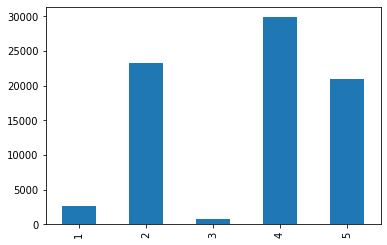

In [9]:
plot_ratings = df['score'].value_counts().sort_index().plot.bar(x='score', y='amount')
df['score'].value_counts().sort_index()

-1    25870
 0      796
 1    50745
Name: polarity, dtype: int64

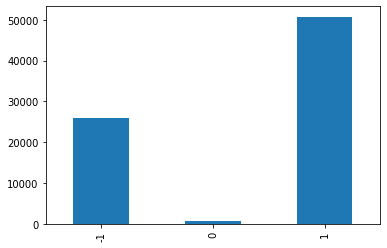

In [10]:
plot_polar = df['polarity'].value_counts().sort_index().plot.bar(x='polarity', y='amount')
df['polarity'].value_counts().sort_index()

In [12]:
# Function to clean text from uneccessary characters
def cleanText(text):
    # remove other than word
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # remove double or more whitespace
    text = re.sub(r'\s\s+', ' ', text)
    # remove whitespace at the start
    text = text.strip()
    
    return text

# Show cleaned text
df['clean_text'] = df['text'].apply(cleanText)

df

,date,username,text,score,polarity,clean_text
no,,,,,,
0,2021-11-16 23:58:12,Nanda Safitri,"Ini gojek kenapa deh, dikit2 driver nggak ada ...",1,-1,Ini gojek kenapa deh dikit driver nggak ada di...
1,2021-11-16 10:24:21,Selaw 212,Kan saya transaksi di aplikasi tokko menggunak...,1,-1,Kan saya transaksi di aplikasi tokko menggunak...
2,2021-11-17 02:21:33,Susilo Joko,Pesan GoFood udah dapat driver. Posisi jauh ga...,1,-1,Pesan GoFood udah dapat driver Posisi jauh ga ...
3,2021-11-16 20:45:35,Doniwan R,"Pihak gojek, apakah admin atau CS anda bisa me...",1,-1,Pihak gojek apakah admin atau CS anda bisa mem...
4,2021-11-15 11:38:24,Hadelberta Uyi Lovelista,"Mohon maaf nih ya, kenapa setiap saya mau gofo...",1,-1,Mohon maaf nih ya kenapa setiap saya mau gofoo...
...,...,...,...,...,...,...
77406,2021-11-15 10:59:33,Suradi Sandra,Terima kasih banyak imfonya Telah Meng update ...,5,1,Terima kasih banyak imfonya Telah Meng update ...
77407,2021-10-22 08:32:15,Pengguna Google,Sekitar bln september 2021 Sudah 2x di tinggal...,5,1,Sekitar bln september Sudah x di tinggal pergi...
77408,2021-09-28 00:35:07,Ferry Parista,"Buat para customer, msh bisa order selain laya...",5,1,Buat para customer msh bisa order selain layan...


In [138]:
# Tokenization and case folding
def tokenization(text):
    text = re.split('[^\w]+', text.lower())

#     Removing stopwords
    stopwords = nltk.corpus.stopwords.words('indonesian')
    text = [word for word in text if word not in stopwords]
    return text

df['tokenized'] = df['clean_text'].apply(tokenization)

df.to_csv('preprocessed-data.csv', columns = ['date', 'username', 'text', 'tokenized', 'score', 'polarity'])
df

,date,username,text,score,polarity,clean_text,tokenized
id,,,,,,,
0,2021-11-16 23:58:12,Nanda Safitri,"Ini gojek kenapa deh, dikit2 driver nggak ada ...",1,-1,Ini gojek kenapa deh dikit driver nggak ada di...,"[gojek, deh, dikit, driver, nggak, deket, rest..."
1,2021-11-16 10:24:21,Selaw 212,Kan saya transaksi di aplikasi tokko menggunak...,1,-1,Kan saya transaksi di aplikasi tokko menggunak...,"[transaksi, aplikasi, tokko, pembayaran, gopay..."
2,2021-11-17 02:21:33,Susilo Joko,Pesan GoFood udah dapat driver. Posisi jauh ga...,1,-1,Pesan GoFood udah dapat driver Posisi jauh ga ...,"[pesan, gofood, udah, driver, posisi, ga, diam..."
3,2021-11-16 20:45:35,Doniwan R,"Pihak gojek, apakah admin atau CS anda bisa me...",1,-1,Pihak gojek apakah admin atau CS anda bisa mem...,"[gojek, admin, cs, membalas, email, pengguna, ..."
4,2021-11-15 11:38:24,Hadelberta Uyi Lovelista,"Mohon maaf nih ya, kenapa setiap saya mau gofo...",1,-1,Mohon maaf nih ya kenapa setiap saya mau gofoo...,"[mohon, maaf, nih, ya, gofood, kemarin, update..."
...,...,...,...,...,...,...,...
77406,2021-11-15 10:59:33,Suradi Sandra,Terima kasih banyak imfonya Telah Meng update ...,5,1,Terima kasih banyak imfonya Telah Meng update ...,"[terima, kasih, imfonya, meng, update, merespo..."
77407,2021-10-22 08:32:15,Pengguna Google,Sekitar bln september 2021 Sudah 2x di tinggal...,5,1,Sekitar bln september Sudah x di tinggal pergi...,"[bln, september, x, tinggal, pergi, gocar, pem..."
77408,2021-09-28 00:35:07,Ferry Parista,"Buat para customer, msh bisa order selain laya...",5,1,Buat para customer msh bisa order selain layan...,"[customer, msh, order, layanan, goride, order,..."
